# Lecture 7.3: Introduction to Logistic Regression    
 
## Outline  

* The Whickham survey
* Binary dependent variable
* The logistic function
* Logistic regresssion
* Interpretation of logistic regression models

## Objectives

Things you should know:  

* If the response variable $Y$ is binary, you need to use logistic regression and not linear regression.  

* In doing so, one is modeling the probability of success.

# The Whickham survey

Data on age, smoking, and mortality from a one-in-six survey of the electoral roll in Whickham, in the UK. The survey was conducted in 1972-1974 among women who were classified as current smokers or as never having smoked. A follow-up on those in the survey was conducted twenty years later.

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
whickham = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/Whickham.csv', index_col=0)
whickham.head()

,outcome,smoker,age
1,Alive,Yes,23
2,Alive,Yes,18
3,Dead,Yes,71
4,Alive,No,67
5,Alive,No,64


In [3]:
whickham.outcome.value_counts()

Alive    945
Dead     369
Name: outcome, dtype: int64

In [4]:
whickham.smoker.value_counts()

No     732
Yes    582
Name: smoker, dtype: int64

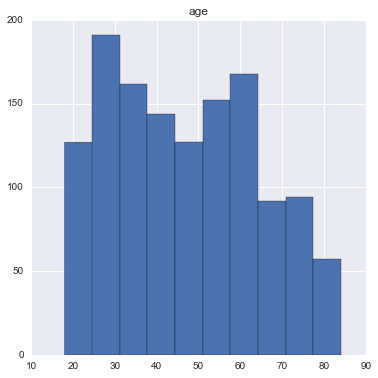

In [5]:
whickham.hist(figsize=(6,6));

## Convert categories to integers:

In [6]:
whickham.outcome = whickham.outcome.map(lambda o: 1 if o == 'Alive' else 0)
whickham.head()

,outcome,smoker,age
1,1,Yes,23
2,1,Yes,18
3,0,Yes,71
4,1,No,67
5,1,No,64


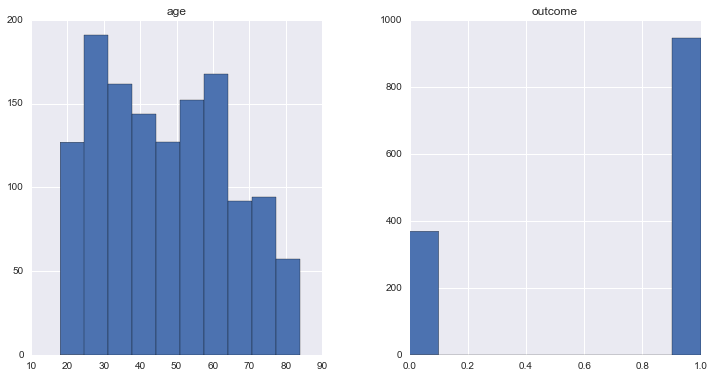

In [7]:
whickham.hist(figsize=(12,6));

In [8]:
lm = smf.ols("outcome ~ 1", data=whickham).fit()
lm.params

Intercept    0.719178
dtype: float64

Modeling the intercept tells us that 71.9% of women surveyed were still alive 20-years later.

Modeling smoker
========================================================
Add whether or not the woman was a smoker to the model:

In [9]:
lm1 = smf.ols("outcome ~ smoker", data=whickham).fit()
lm1.params

Intercept        0.685792
smoker[T.Yes]    0.075376
dtype: float64

...smokers are 7.54% more likely to survive?!?

Modeling smoker + age
========================================================

In [10]:
lm2 = smf.ols("outcome ~ smoker + age", data=whickham).fit()
lm2.params

Intercept        1.472554
smoker[T.Yes]    0.010474
age             -0.016155
dtype: float64

A 20-year old smoker: $1.47 + 0.01 - 0.016 \times 20 = 1.16$  
...has a $116\%$ chance of being a live 20-years later??

Probability(?) of Outcome
========================================================

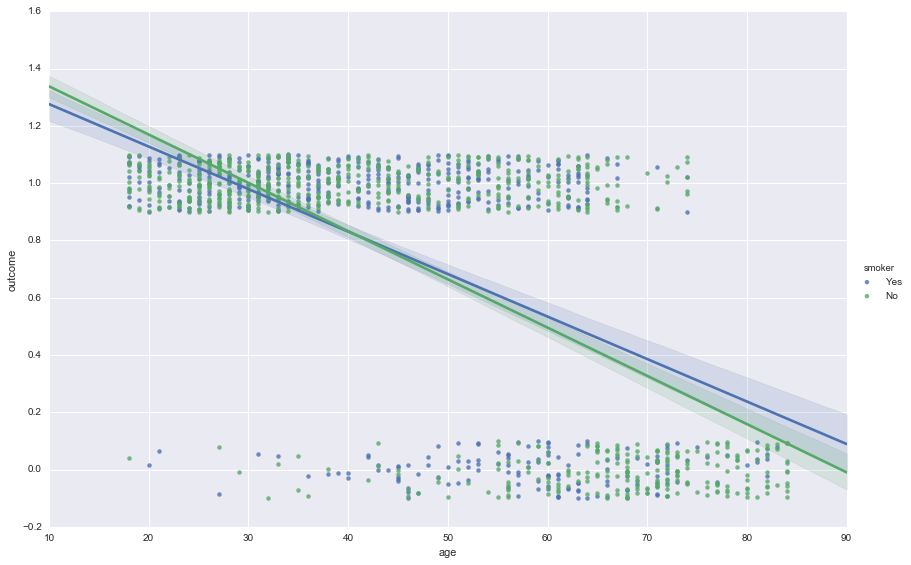

In [11]:
sns.lmplot("age", "outcome", whickham, hue="smoker", size=8, aspect=1.5, y_jitter=.1);

## What is Logistic Regresssion?  

* **A generalization** of linear regression used to solve **classification problems**.

* In linear regression, we used a set of covariates to predict the value of a **(continuous) outcome variable.**

* In logistic regression, we use a set of covariates to predict _probabilities_ of **(binary) class membership.**

* These probabilities are then mapped to _class labels_, thus solving the classification problem.

* There are many important research topics for which the dependent variable is a categorical variable.  

* For example: voting, mortality, and participation data is not continuous or distributed normally.  

* logistic regression is a type of regression analysis where the dependent variable is a dummy variable: coded 0 (did not vote) or 1(did vote)

In the usual regression model set-up, we assume that $Y$ is a linear function of $k$ $x$ variables, plus some random noise:  

$$ Y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k + \varepsilon $$  

Another way of stating this is:  

$$ E(Y) = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k $$

Now regression works fine and well if $Y$ is continuous (or nearly so), but things can go wrong if $Y$ is discrete.  

A special case is when $Y$ takes on only the values 0 or 1.  

For a 0, 1 random variable $Y$, we have that  

$$ E(Y) = 0 P(Y = 0) + 1 P(Y = 1)$$  

Thus for a 0, 1 random variable $Y$  

$$ E(Y) = P(Y = 1) $$

If we use regression as we know it to model a 0, 1 variable, our model is modeling  

$$ P(Y = 1) = p = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k $$  

This is sometimes called a “linear probability model”.  

Why may this be a bad idea?  


What do we know about probabilities?

### The Regression Model

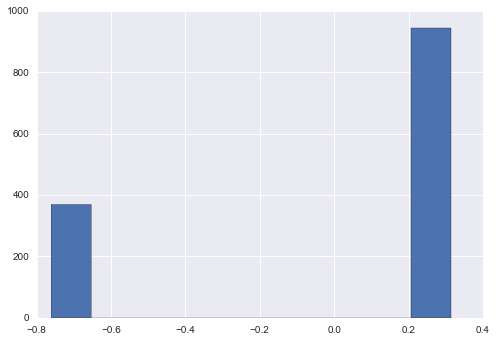

In [12]:
lm1.resid.hist();

### Problems with using regression

* Linear regression is not the appropriate model to use if the $Y$ variable is binary (0/1).   

* This is true for several reasons
    * Predictions might be outside the (0, 1) range
    * The noise is clearly not Normal

### How do we fix this?  

* We need to come up with some function $f(x)$ so that $f(x)$ is in the interval $[0, 1]$ for all $x$ values.  

* We can then model $P(Y = 1 | x) = f(x)$.   

* We were using $f(x) = b_0 + b_1(x)$, but this f(x) function doesn’t always produce values in the interval $[0, 1]$.  

* It turns out there are several possible functions to use for $f(x)$.


### The Logistic Function

* The logistic function is defined to be

$$ f(t) = \frac{e^t}{1 + e^t} = \frac{exp(t)}{1 + exp(t)} = \frac{1}{1 + e^{-t}} $$

* No matter what $t$ value you use as an input, $f(t)$ will always be in the interval $[0, 1]$.  


### Plot of the Logistic Function

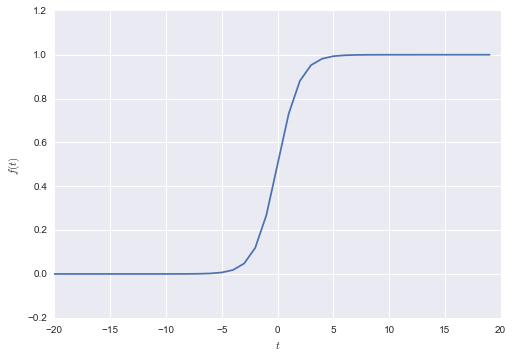

In [13]:
t = arange(-20, 20)
f = exp(t) / (1 + exp(t))
ylim((-0.2, 1.2))
xlabel('$t$')
ylabel('$f(t)$')
plot(t, f);

### The Logistic Regression Model  
  
* The logistic regression model says  

$$ P(Y = 1) = p = \frac{exp(\beta_0 + \beta_1 x_1 + \dots + \beta_k x_k)}{1 + exp(\beta_0 + \beta_1 x_1 + \dots + \beta_k x_k)} $$  

* Similar to linear regression, the unknown parameters are $\beta_0, \beta_1, \dots, \beta_k$  

* The coefficients are estimated using maximum likelihood (MLE) instead of least squares (OLS).  

In [14]:
logit_model1 = smf.logit("outcome ~ smoker + age", data=whickham).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: 0.359597
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.3943
Time:                        14:00:42   Log-Likelihood:                -472.51
converged:                       True   LL-Null:                       -780.16
                                        LLR p-value:                2.454e-134
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5992      0.441     17.223      0.000       6.734       8.464
smoker[T.Yes]    -0.2047      0.168     -1.215      0.224      -0.535       0.125
age              -0.1237      0.007    -17.233      0.000      -0.138      -0.110
=================================================================================
"""

In [17]:
sns.lmplot?

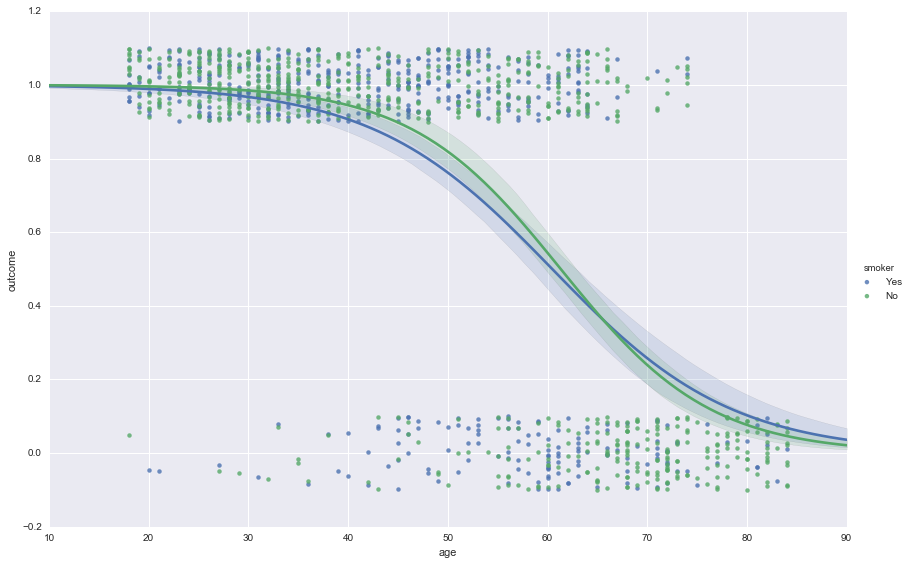

In [16]:
sns.lmplot("age", "outcome", whickham, hue="smoker", logistic=True, size=8, aspect=1.5, y_jitter=.1);

## Interpreting the Coefficients

* In logistic regression, there is a nonlinear relationship between the probability of success (spam) and the $x$ variable(s)  

* So there is no simple interpretation such as “a unit increase in number of characters increases the probability of spam by blah.”    

### Linear Regression Coefficients

Linear regression coefficients are fairly easy to interpret:

```
(Intercept)   smokerYes         age 
    1.47255     0.01047    -0.01616 
```

$$ y = 1.47 + 0.01 \times (smoker = Yes) - 0.016 \times age $$  

$y$ is the dependent variable

### Logistic Regression Coefficients

Logistic regression coefficients are less straightforward:

```
(Intercept)   smokerYes         age 
     7.5992     -0.2047     -0.1237 
```

$$ y = 7.599 - 0.205 \times (smoker = Yes) - 0.124 \times age $$

Take our 20-year old smoker:  
$$ y = 7.599 - 0.205 - 0.124 \times 20 = 4.9 $$  

But what does $y = 4.9$ mean?

### Interepeting Results

In linear regression, the parameter $\beta$ represents the change in the response variable for a unit change in the covariate.

In logistic regression, $\beta$ represents the change in the logit function for a unit change in the covariate.

$$ \pi(1) = \frac{e^\beta}{1+e^\beta} $$

$$ \frac{e^{4.9}}{1+e^{4.9}} = 0.99 $$

In other words, our 20-year-old smoker has a 99% chance of surviving another 20 years.

<!--

# Odds

"**Odds** are another way of talking about probability $\pi$. Rather than being a number between 0 and 1, an odds is a number between 0 and $\infty$. The odds is calculated as: 
$$ O(1) = \frac{\pi(1)}{1 - \pi(1)} $$  
For example:  given a probability 50.0%: $O(1) = ^{0.50}/_{1 - 0.50} = 1$"

(from [Statistical Modeling](http://www.mosaic-web.org/go/StatisticalModeling/))

Odds Ratio
========================================================
The **odds ratio** of a binary event is given by the odds of the event divided by the odds of its complement:  
$$ OR = \frac{O(x=1)}{O(x=0)} = \frac{^{\pi(1)}/_{1 - \pi(1)}}{^{\pi(0)}/_{1 - \pi(0)}} $$

Interepeting Results
========================================================
incremental: true
Substituting the definition of $\pi(x)$ into this equation yields:  
$$ OR = e^\beta $$

This simple relationship between the odds ratio and the parameter $\beta$ is what makes logistic regression such a powerful tool.

How do we interpret this?
========================================================
The odds ratio of a binary event gives the increase in likelihood of an outcome if the event occurs.

Example
========================================================
Suppose we are flipping coins.

In this case, we know that the probability of it landing on tails is .5, and the probability of it landing on heads is .5

Therefore, we know our odds ratio is $\frac{^{.5}/_{.5}}{^{.5}/_{.5}} = 1$



Example
========================================================
Suppose we are interested in mobile purchase behavior. Let $y$ be a class label denoting purchase/no purchase, and let $x$ denote a mobile OS (for example, iOS). Say:  
$P(purchase|Android) = 69.8\%$ and  
$P(purchase|iOS) = 83.1\%$ 

* $O_{Android}(1) = \frac{0.698}{0.302} = 2.31$
* $O_{iOS}(1) = \frac{0.831}{0.179} = 4.6$

In this case, an odds ratio of $^{4.6}/_{2.3} = 2$ indicates that a purchase is twice as likely for an iOS user as for an Android user.

Intrepreting Results - Review
========================================================
We measure change using the logit function

Odds let us know how likely some even will occur

An odds ratio provides the change in likelihood for some event

Odds ratio helps us understand how different features effect the final probability!

---

We define the **odds** of Y = 1 as,

$$odds = \frac{P(Y = 1)}{1 - P(Y = 1)} = e^{\beta_0 + \beta_1 X_1 + \dots + \beta_p X_p}$$

We interpret the $\beta's$ in multiplicative terms with respect to the odds.

E.g., the interpretation of $\beta_1$ is, holding all the other variables/features fixed, for every unit increase in $X_1$, the odds of $Y = 1$ changes by a factor of $e^{\beta_1}$. 

**Note**: **positive** coefficients **increase** the probability, and **negative** coefficients **decrease** the probability of success.

In our spam example, 

$$ e^{-0.0621} = 0.94 $$

For each additional character in the email, we expect the odds of it being spam decreases by about 6%. 
-->

### Model Checking

There are several statistics which can be used for comparing alternative models or evaluating the performance of a single model:  

* Model Chi-Square (like the overall F test)  

* Pseudo-$R^2$ (like the $R^2$ statistic)

## Summary

**Things you should know**:  

* If the response variable $Y$ is binary, you need to use logistic regression and not linear regression.  

* In doing so, one is modeling the probability of success.